Задание

Цель: применить на практике базовые ансамблевые методы

Описание задания:

В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов. Данные для обучения моделей необходимо загрузить самостоятельно с [сайта](https://www.kaggle.com/fedesoriano/heart-failure-prediction). Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. (Подробнее о признаках можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.)

Этапы работы:

Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
Подготовьте датасет к обучению моделей.

a) Категориальные переменные переведите в цифровые значения. Можно использовать [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html), [preprocessing.LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). Старайтесь не использовать для этой задачи циклы.

b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

Обучите дерево решений на обучающем множестве. Используйте следующие модели:

a) [tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

b) [ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.
Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.

Обучите бэггинг над моделью из п. 4a. Используйте [ensemble.BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html).

a) Повторите п. 5

Обучите стекинг трех моделей: из п. 4a, п. 4b и [svm.LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html). Используйте [ensemble.StackingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html).

a) Повторите п. 5

Сформулируйте выводы по проделанной работе.

a) Сравните метрики построенных моделей.

b) Напишите свое мнение, какая модель наилучшая и почему.

Для получения зачета по этому домашнему заданию, минимально, должны быть обучены следующие модели: дерево решений, стекинг трех моделей. В данных должны быть обработаны категориальные значения.

Результат: получены знания по использованию базовых ансамблевых методов.

Форма выполнения:
ссылка на Jupyter Notebook, загруженный на GitHub
ссылка на Google Colab
файл с расширением .ipynb
Инструменты:
Jupyter Notebook/Google Colab;
GitHub.

данные с [сайта](https://www.kaggle.com/fedesoriano/heart-failure-prediction)

[pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html), [preprocessing.LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

модели 
[tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) и [ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

[metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

[ensemble.BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

[svm.LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)

[ensemble.StackingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html)

Срок выполнения: дедлайн приема решений на проверку

Рекомендации к выполнению:

Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.

У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читабельность.

Убедитесь, что по ссылкам есть доступ на чтение/просмотр.

Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

1.Получите данные и загрузите их в рабочую среду.

In [1]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import sklearn.metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier


In [2]:
data=pd.read_csv('heart.csv')
data.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


2.Подготовьте датасет к обучению моделей.

Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

In [3]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [4]:
selectedColumns = data[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope','HeartDisease']]
df_updated = pd.get_dummies(selectedColumns)
df_updated.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


*Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).


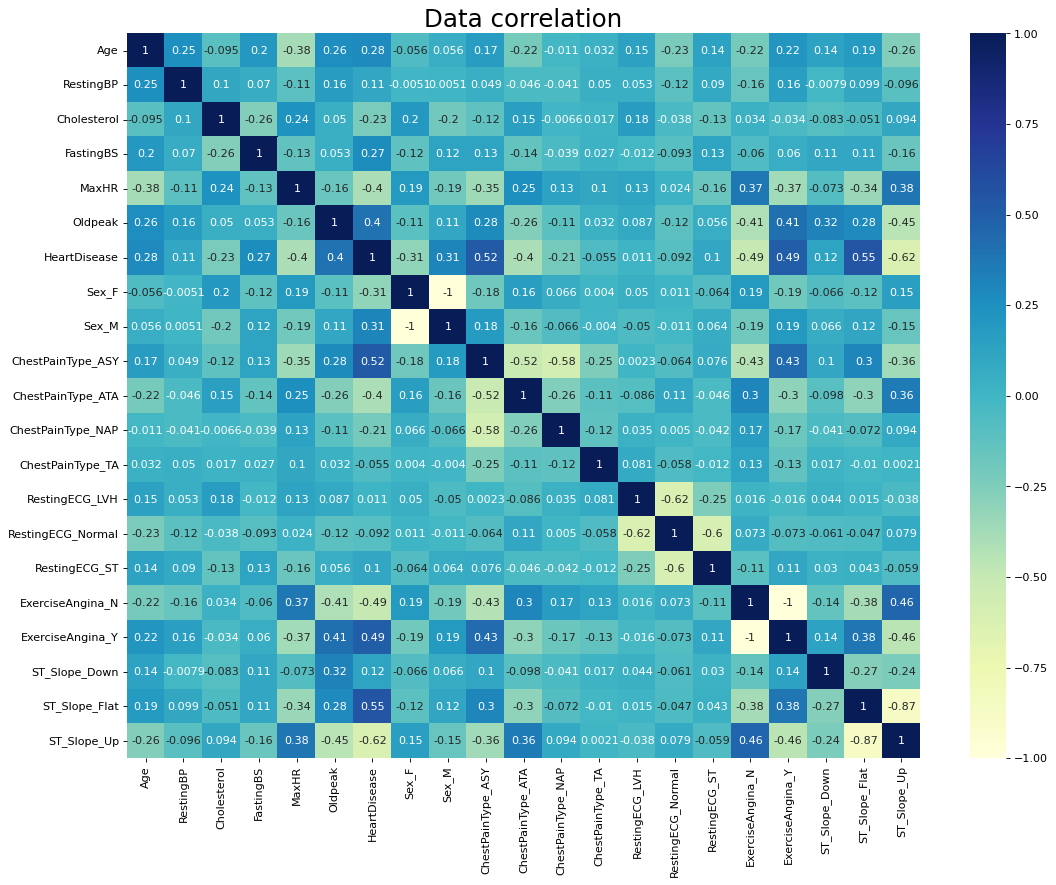

In [14]:

plt.figure(figsize=(16,12), dpi= 80)
sns.heatmap(df_updated.corr(), xticklabels=df_updated.corr().columns, yticklabels=df_updated.corr().columns, cmap='YlGnBu', center=0, annot=True)

plt.title('Data correlation', fontsize=22)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

3.Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.


In [15]:
X = df_updated.drop(['HeartDisease'],axis=1)
y = df_updated['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4.Обучите дерево решений на обучающем множестве. Используйте следующие модели:

a) tree.DecisionTreeClassifier

b) ensemble.RandomForestClassifier

In [24]:
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)
y_pred1 = clf.predict(X_test)

classifier.score(X_test, y_test), clf.score(X_test, y_test)

(0.7880434782608695, 0.842391304347826)

5.Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.


In [32]:
print('DecisionTreeClassifier')
print(classification_report(y_test, y_pred, target_names=['0','1']))

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.72      0.82      0.76        77
           1       0.85      0.77      0.81       107

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.80      0.79      0.79       184



In [33]:
print('RandomForestClassifier')
print(classification_report(y_test, y_pred1, target_names=['0','1']))


RandomForestClassifier
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        77
           1       0.89      0.83      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



6.Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.


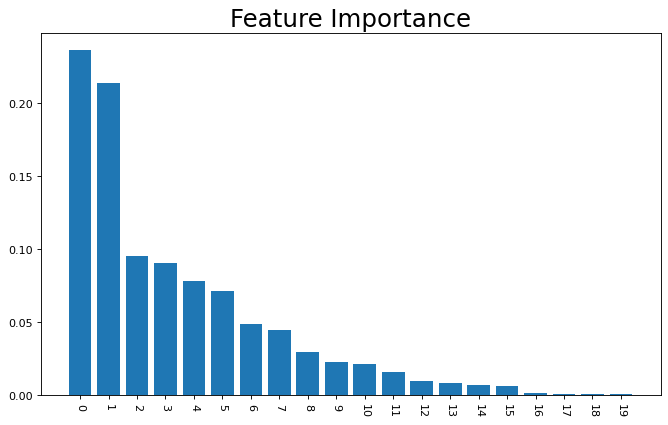

In [34]:
importance = sorted(clf.feature_importances_,reverse = True)

plt.figure(figsize=(10,6), dpi= 80)
plt.title('Feature Importance', fontsize=22)
plt.bar(([x for x in range(len(importance))]),importance)
plt.xticks([x for x in range(len(importance))],rotation = 270,fontsize=10)
plt.yticks(fontsize=10)
plt.show()

7.Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.
Повторите п. 5

In [35]:
Bclf = BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=0).fit(X_train, y_train)
y_pred2 = Bclf.predict(X_test)

In [36]:
print('BaggingClassifier')
print(classification_report(y_test, y_pred2, target_names=['0','1']))

BaggingClassifier
              precision    recall  f1-score   support

           0       0.59      0.71      0.64        77
           1       0.76      0.64      0.69       107

    accuracy                           0.67       184
   macro avg       0.67      0.67      0.67       184
weighted avg       0.68      0.67      0.67       184



8.Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.
Повторите п. 5


In [37]:
Sclf = make_pipeline(StandardScaler(),LinearSVC(random_state=42))
Sclf.fit(X_train, y_train)

estimators = [
     ('DTC',DecisionTreeClassifier()),
     ('RF', RandomForestClassifier(max_depth=3, random_state=0)),
     ('SVR', make_pipeline(StandardScaler(),LinearSVC(random_state=42)))
             ]
SCclf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
SCclf.fit(X_train, y_train)

y_pred_SCclf = SCclf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

In [38]:
Sclf.score(X_test, y_test), SCclf.score(X_test, y_test)

(0.8532608695652174, 0.8695652173913043)

In [39]:
print('StackingClassifier')
print(classification_report(y_test, y_pred_SCclf, target_names=['0','1']))

StackingClassifier
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        77
           1       0.90      0.87      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



9.Сформулируйте выводы по проделанной работе.

a) Сравните метрики построенных моделей.

b) Напишите свое мнение, какая модель наилучшая и почему.

Лес лучше дерева, так как там деревьев больше))) , а так же в материалах стоит, что это согласуется с мнением Ф.Гальтона о живовтноводстве и теореме Кондорсе, если я правильно её понимаю.

Стекинг интереснее тем, что использует разные алгоритмы, наверное поэтому и результаты лучше выдал.


Добрый день, Алексей, спасибо за выполненную работу!

Вижу у вас появились предупреждения Liblinear failed to converge, increase the number of iterations. даже несмотря на масштабирование, полагаю, нужно было добавить количество итераций у финальной логистической регрессии просто.

Выводы и решение отличное, зачёт!

По ансамблям могу также порекомендовать статью:
https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/